In [45]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import os
import pandas as pd

In [46]:
#variáveis auxiliares

pasta_resultados = "../results/"
pasta_dados = "../data/"

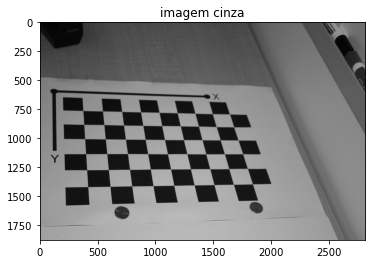

In [47]:
#carrega 1 imagem para teste

image_file = pasta_dados+"image_calib_1.jpg"

imageBGR = cv2.imread(image_file, cv2.IMREAD_COLOR )

imageRGB = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2RGB )
gray_image = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray", vmin=0, vmax=255)
plt.title('imagem cinza')
plt.show()

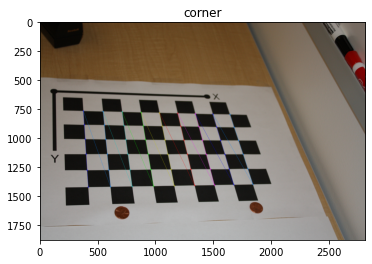

In [48]:
#calcula os cantos do tabuleiro de xadrez
#open cv já possui uma função especifica para tal calibragem disponivel em:
# https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
# https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornersubpix

#item 2 e 3 da lista iterativo com 1 imagem


#variável interna utilizada pelo cornerSubPix para refinar a busca por cantos
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#calcula os cantos do tabuleiro de xadrez
ret, corners = cv2.findChessboardCorners(gray_image, (6,9),None)

#caso tenha conseguido encontrar os cantos, é feito um refinamento e é traçado os pontos na imagem
if ret:
    corners2 = cv2.cornerSubPix(gray_image,corners,(11,11),(-1,-1),criteria)

    img = cv2.drawChessboardCorners(imageRGB, (6,9), corners2,ret)

    plt.imshow(img)
    plt.title('corner')
    plt.show()

    # cv2.imwrite(pasta_resultados+'teste1.jpg', img)


In [49]:
# vetor com as coordendas X,Y representando coordenadas do mundo real dos 54 cantos dos
# quadrados do tabuleiro

#item 4

CHECKERBOARD = (6,9)



check_board_points = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
check_board_points[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
check_board_points = check_board_points*29
check_board_points

array([[[  0.,   0.,   0.],
        [ 29.,   0.,   0.],
        [ 58.,   0.,   0.],
        [ 87.,   0.,   0.],
        [116.,   0.,   0.],
        [145.,   0.,   0.],
        [  0.,  29.,   0.],
        [ 29.,  29.,   0.],
        [ 58.,  29.,   0.],
        [ 87.,  29.,   0.],
        [116.,  29.,   0.],
        [145.,  29.,   0.],
        [  0.,  58.,   0.],
        [ 29.,  58.,   0.],
        [ 58.,  58.,   0.],
        [ 87.,  58.,   0.],
        [116.,  58.,   0.],
        [145.,  58.,   0.],
        [  0.,  87.,   0.],
        [ 29.,  87.,   0.],
        [ 58.,  87.,   0.],
        [ 87.,  87.,   0.],
        [116.,  87.,   0.],
        [145.,  87.,   0.],
        [  0., 116.,   0.],
        [ 29., 116.,   0.],
        [ 58., 116.,   0.],
        [ 87., 116.,   0.],
        [116., 116.,   0.],
        [145., 116.,   0.],
        [  0., 145.,   0.],
        [ 29., 145.,   0.],
        [ 58., 145.,   0.],
        [ 87., 145.,   0.],
        [116., 145.,   0.],
        [145., 145.,

In [50]:
# Para realizar a calibração da câmera, será necessário alimentar o algoritmo com as várias imagens fornecidas pela lista
# Logo, as etapas iniciais acima serão executadas de forma automatica para todas as imagens e salvas na pasta de resultados

#item 5, 6 e 7

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Vetor para armazenar os pontos 3D de cada checkerboard das imagens
all_check_board_points = []
# Vetor para armazenar os pontos 2D dos cantos de cada imagem
all_corners = []


# Loop para guardar os cantos e os pontos 3D para cada uma das imanges.
# Para depois, com os pontos salvos realizar a calibração de câmera

for i in range(1, 10):
    fname = pasta_dados+"image_calib_"+str(i)+".jpg"
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Função de detecção de cantos
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    #Caso a quantidade de cantos desejada seja equivalente a encontrada, ret == True
    if ret:
        all_check_board_points.append(check_board_points)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        
        all_corners.append(corners2)

        # Salva a imagem com os cantos desenhados
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    
    cv2.imwrite(pasta_resultados+"image_calib_"+str(i)+'.jpg',img)


h,w = img.shape[:2]



# Realiza a calibração da câmera passanod os valores dos pontos em 3D e 
# as coordenadas dos pontos de canto encontrados anteriormente
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(all_check_board_points, all_corners, gray.shape[::-1], None, None)

#print(ret)
print("Matriz intrinseca da câmera : \n")
print(mtx)
print("\n\ncoeficiente de distorção da lente : \n")
print(dist)
print("\n\nvetores de rotação por imagem: \n")
print(rvecs)
print("\n\nvetores de translação por imagem: \n")
print(tvecs)

Matriz intrinseca da câmera : 

[[4.63510957e+03 0.00000000e+00 1.46278207e+03]
 [0.00000000e+00 4.61457265e+03 9.51147015e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


coeficiente de distorção da lente : 

[[-1.27382329e-01  3.56180003e+00  1.34915824e-03  3.22295935e-03
  -3.46538251e+01]]


vetores de rotação por imagem: 

[array([[-0.37627899],
       [-0.8451473 ],
       [-1.57734912]]), array([[-0.56800548],
       [-0.74686793],
       [-1.53628791]]), array([[-0.5060731 ],
       [-0.64746113],
       [-1.54207075]]), array([[-0.40753324],
       [-0.73637568],
       [-1.53721243]]), array([[-0.51404903],
       [-0.85142383],
       [-1.53144141]]), array([[-0.46851402],
       [-0.80549644],
       [-1.93600656]]), array([[-0.23555485],
       [-1.05168421],
       [-2.73917751]]), array([[0.06036876],
       [1.15384937],
       [2.87977384]]), array([[-0.39140906],
       [-1.12307555],
       [-2.85710671]])]


vetores de translação por imagem: 

[array([[-158.

In [51]:
# Realiza o mesmo procedimento feito anteriormente para calibração da câmera, porém utilizando o segundo conjunto de imagem

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Vetor para armazenar os pontos 3D de cada checkerboard das imagens
all_check_board_points = []
# Vetor para armazenar os pontos 2D dos cantos de cada imagem
all_corners = []


# Loop para guardar os cantos e os pontos 3D para cada uma das imanges.
# Para depois, com os pontos salvos realizar a calibração de câmera

for i in range(1, 11):
    fname = pasta_dados+"image_dist_"+str(i)+".jpg"
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Função de detecção de cantos
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    #Caso a quantidade de cantos desejada seja equivalente a encontrada, ret == True
    if ret:
        all_check_board_points.append(check_board_points)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        
        all_corners.append(corners2)

        # Salva a imagem com os cantos desenhados
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    
    cv2.imwrite(pasta_resultados+"image_dist_"+str(i)+'.jpg',img)


h,w = img.shape[:2]



# Realiza a calibração da câmera passanod os valores dos pontos em 3D e 
# as coordenadas dos pontos de canto encontrados anteriormente
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(all_check_board_points, all_corners, gray.shape[::-1], None, None)

#print(ret)
print("Matriz intrinseca da câmera : \n")
print(mtx)
print("\n\ncoeficiente de distorção da lente : \n")
print(dist)
print("\n\nvetores de rotação por imagem: \n")
print(rvecs)
print("\n\nvetores de translação por imagem: \n")
print(tvecs)

Matriz intrinseca da câmera : 

[[733.48150242   0.         575.60842721]
 [  0.         733.72894661 346.82997621]
 [  0.           0.           1.        ]]


coeficiente de distorção da lente : 

[[-0.42311199  0.45042816  0.00387383 -0.00582309 -0.25349686]]


vetores de rotação por imagem: 

[array([[-0.35272625],
       [-0.68009109],
       [-1.89284838]]), array([[-0.48391637],
       [-0.65432746],
       [-1.30074007]]), array([[-0.42100722],
       [-0.67815116],
       [-1.63554729]]), array([[-0.2433713 ],
       [-0.77009793],
       [-2.06466103]]), array([[-0.14491103],
       [-0.39901811],
       [-1.65922101]]), array([[-0.59698822],
       [-0.60508808],
       [-1.45728381]]), array([[-0.70813545],
       [-0.43855535],
       [-1.06045819]]), array([[-0.63289588],
       [-0.53713883],
       [-1.28802174]]), array([[-0.48803204],
       [-0.47203047],
       [-1.15449712]]), array([[ 0.44850321],
       [ 0.0969221 ],
       [-1.58620582]])]


vetores de translaç

In [52]:
# Remove a distorção das imagens do segundo conjunto de imagens e salva no diretorio de resultados


for i in range(1, 11):
    fname = pasta_dados+"image_dist_"+str(i)+".jpg"
    img = cv2.imread(fname)
    
    #refina a matriz de camera obtida anteriormente para melhor resultado
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    
    cv2.imwrite(pasta_resultados+'undistort_image_dist_'+str(i)+'.jpg',dst)